# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT INTERN/customer segmentation/bank.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
print(f"Jumlah seluruh data: {data.shape[0]} baris")

Jumlah seluruh data: 11162 baris


# Features Selection

In [ ]:
features = ["balance","age","campaign"]
X = data[features]

# Standarisasi

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans_test = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_test.fit(X_scaled)
  wcss.append(kmeans_test.inertia_)


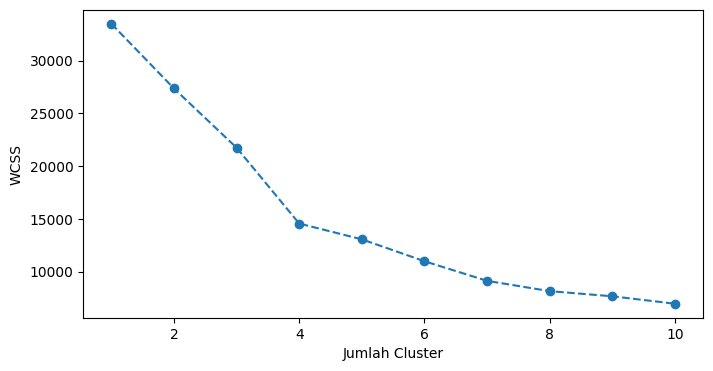

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(1,11), wcss, marker='o', linestyle = '--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

# Building The Model

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [ ]:
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [ ]:
labels = kmeans.predict(X_scaled)
data['Cluster'] = labels

# Evaluation

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
sil_score = silhouette_score (X_scaled, labels)
db_score = davies_bouldin_score(X_scaled, labels)
print("Silhouette Score:", sil_score)
print("Davies-Bouldin Score:", db_score)

Silhouette Score: 0.4206396308824726
Davies-Bouldin Score: 0.8368360721905563


# Visualization

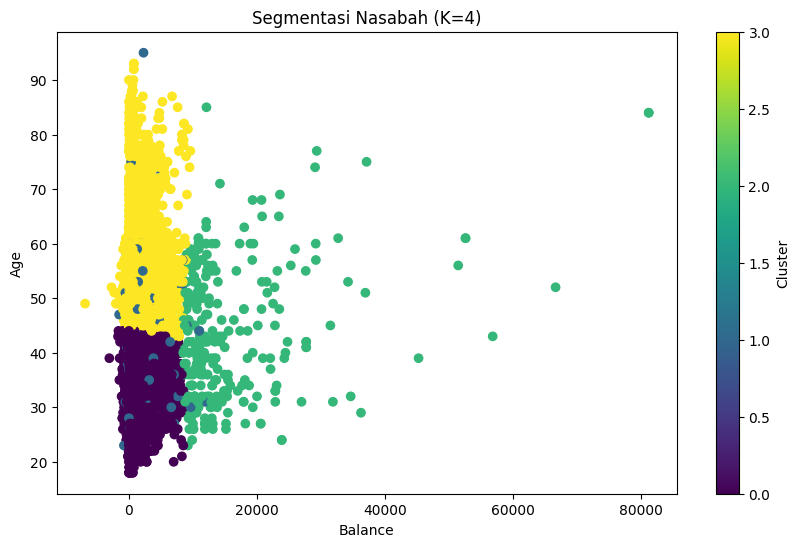

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data["balance"], data["age"], c=data['Cluster'], cmap='viridis')
plt.title("Segmentasi Nasabah (K=4)")
plt.xlabel("Balance")
plt.ylabel("Age")
plt.colorbar(label='Cluster')
plt.show()

Bar Chart

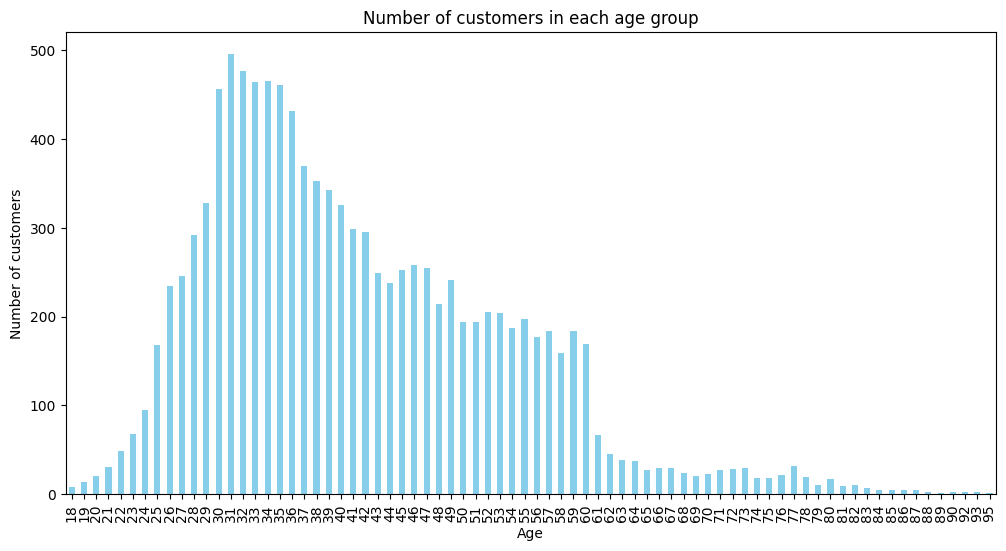

In [ ]:
# Disesuaikan untuk melihat distribusi umur nasabah secara umum
plt.figure(figsize=(12, 6))
data['age'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Number of customers in each age group")
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.show()

/tmp/ipython-input-1379835903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='balance', data=data, palette='viridis')


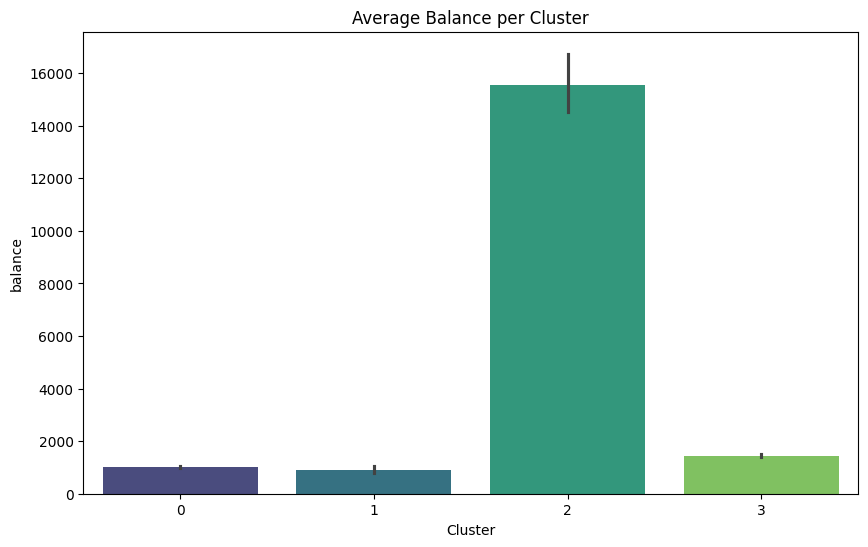

In [ ]:
# Membantu bank mengidentifikasi kelompok nasabah bernilai tinggi
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='balance', data=data, palette='viridis')
plt.title('Average Balance per Cluster')
plt.show()

Pie Chart

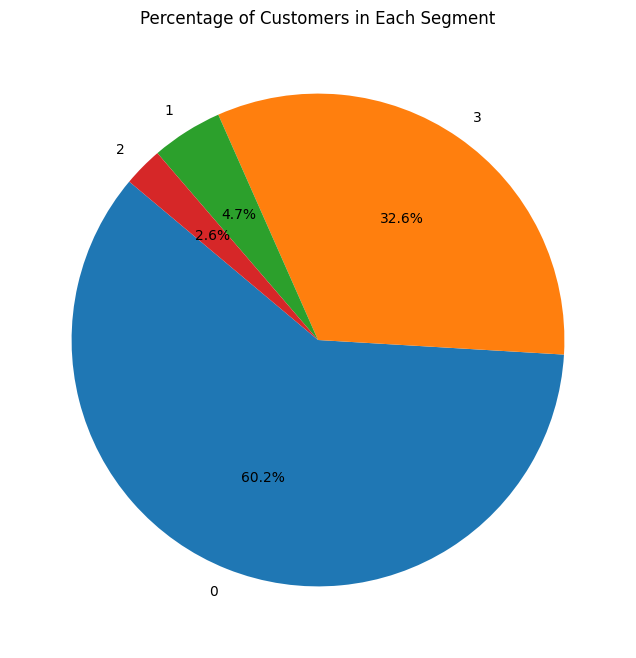

In [ ]:
# Memberikan gambaran ukuran setiap segmen nasabah
cluster_counts = data['Cluster'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Percentage of Customers in Each Segment")
plt.show()

Scatter Plot

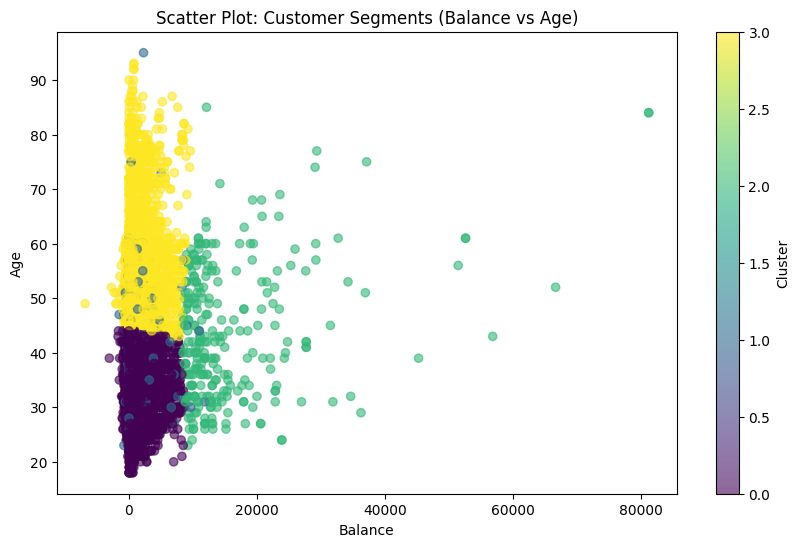

In [ ]:
# Visualisasi utama untuk melihat persebaran segmen
plt.figure(figsize=(10, 6))
plt.scatter(data["balance"], data["age"], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.title("Scatter Plot: Customer Segments (Balance vs Age)")
plt.xlabel("Balance")
plt.ylabel("Age")
plt.colorbar(label='Cluster')
plt.show()

Customer Subsciption

In [ ]:
data['deposit_numeric'] = data['deposit'].map({'yes': 1, 'no': 0})

In [ ]:
correlation_matrix = data.corr(numeric_only=True)
subscription_corr = correlation_matrix['deposit_numeric'].sort_values(ascending=False)

In [ ]:
print("Faktor yang paling berkorelasi dengan langganan nasabah:")
print(subscription_corr)

Faktor yang paling berkorelasi dengan langganan nasabah:
deposit_numeric    1.000000
duration           0.451919
pdays              0.151593
previous           0.139867
balance            0.081129
age                0.034901
Cluster            0.026331
day               -0.056326
campaign          -0.128081
Name: deposit_numeric, dtype: float64


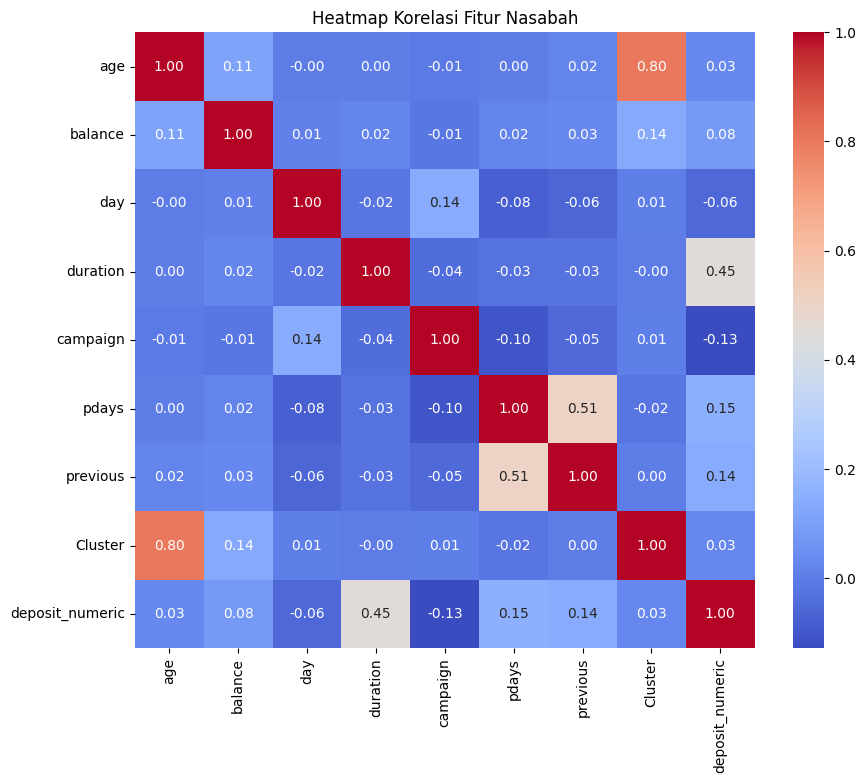

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Fitur Nasabah")
plt.show()